In [1]:
import numpy as np
import time as time
import matplotlib.pyplot as plt

In [2]:
def func(prices, targets, capital):
    stocks = np.ones(len(prices), dtype=int) * ((capital/len(prices))//prices).astype('int')
    capital = capital - np.sum(prices*stocks)
    
    fitness = np.zeros(len(prices))
    while True:
        for i in range(len(prices)):
            stocks[i] += 1
            fitness[i] = np.sum((prices*stocks / np.sum(prices*stocks) - targets)**2)
            stocks[i] -= 1
        idx = np.argmin(fitness)
        if capital - prices[idx] < 0:
            break
        else:
            stocks[idx] += 1
            capital -= prices[idx]
    return stocks

In [40]:
Ns = np.arange(10, 1200, 80)
times = []
for N in Ns:
    prices = np.ones(N)*10 + np.random.random(N)*100
    targets = np.ones(N)/N
    capital = N*1000
    start = time.time()
    func(prices, targets, capital)
    times.append(time.time() - start)

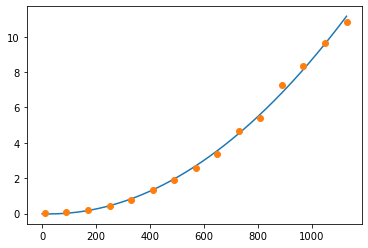

In [41]:
a,b,c = np.polyfit(Ns, times, 2)
x = np.linspace(0, Ns[-1], 1000)
plt.plot(x, a*x**2 + b*x + c)
plt.plot(Ns, times, 'o')
plt.show()